In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#
# Import Keras modules
from keras import models
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.neural_network import MLPClassifier # neural network

In [26]:
col_names = ['slength', 'swidth', 'plength', 'pwidth', 'label']
# load dataset
iris = pd.read_csv("iris.csv", header=None, names=col_names)

iris.head()

,slength,swidth,plength,pwidth,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# Load the iris dataset

iris = datasets.load_iris()

In [28]:
X = iris.data
y = iris.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [30]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [31]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [32]:
clf.fit(X_train, y_train)

D:\Users\sf41\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [33]:
prediction = clf.predict(X_test)
print(prediction)

[2 1 1 2 1 1 2 1 2 0 1 2 0 1 0 1 2 2 1 2 2 0 1 2 2 2 1 2 1 2 1 0 1 1 2 2 1
 0 0 1 2 2 1 0 0]


In [34]:
print(y_test)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [35]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(4,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))

In [45]:
learning_rate=0.01
sgd=SGD(learning_rate)
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
H=network.fit(X_train, train_labels, epochs=50, batch_size=10,validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 0s 29ms/step - loss: 0.1955 - accuracy: 0.9167 - val_loss: 0.0763 - val_accuracy: 1.0000
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1387 - accuracy: 0.9524 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.0973 - val_accuracy: 0.9524
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1142 - accuracy: 0.9762 - val_loss: 0.2340 - val_accuracy: 0.9048
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1695 - accuracy: 0.9405 - val_loss: 0.0713 - val_accuracy: 0.9524
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1742 - accuracy: 0.9048 - val_loss: 0.0928 - val_accuracy: 0.9524
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1505 - accuracy: 0.9524 - val_loss: 0.1060 - val_accuracy: 0.9524
Epoch 8/50
9/9 [=================

In [47]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

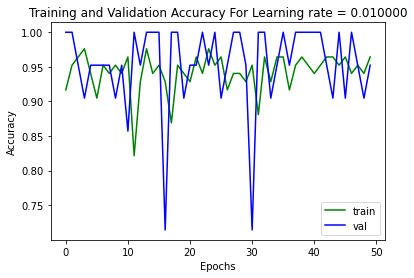

In [48]:
Acc_train = H.history['accuracy']
Accu_val = H.history['val_accuracy']
plt.plot(Acc_train, 'g', label='Training accuracy')
plt.plot(Accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy For Learning rate = %f' % learning_rate)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='lower right')
plt.show()

In [49]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
train_loss, train_acc = network.evaluate(X_train, train_labels)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)
print('Train Accuracy: ', train_acc, '\nTrain Loss: ', train_loss)

2/2 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9556
Test Accuracy:  0.9555555582046509 
Test Loss:  0.12851814925670624
